In [233]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [234]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [235]:
train_values.shape

(260601, 39)

As we can see, we have 39 features and 260601 records

In [236]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [237]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


Now we have to predict the damage's class (`damage_grade`)
  - Explore how many class has this feature

In [238]:
print('\"damage_grade\" has {} class'.format(train_labels.damage_grade.unique()))

"damage_grade" has [3 2 1] class


From dataset explaination, we know that 1 indicate a minor damage. 3 indicate a chatastrofic damage.
  - This is the feature to predict.
  
Now merge the two table into one.

In [239]:
train = train_values.set_index('building_id').join(train_labels.set_index('building_id'), on='building_id')
train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


`building_id` become the index of the dataframe and we have the new feature `damage_grade` into the dataset.

In [240]:
train.isna().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

Today, we are lucky... no `nan` values are in the dataset.

In [241]:
train.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


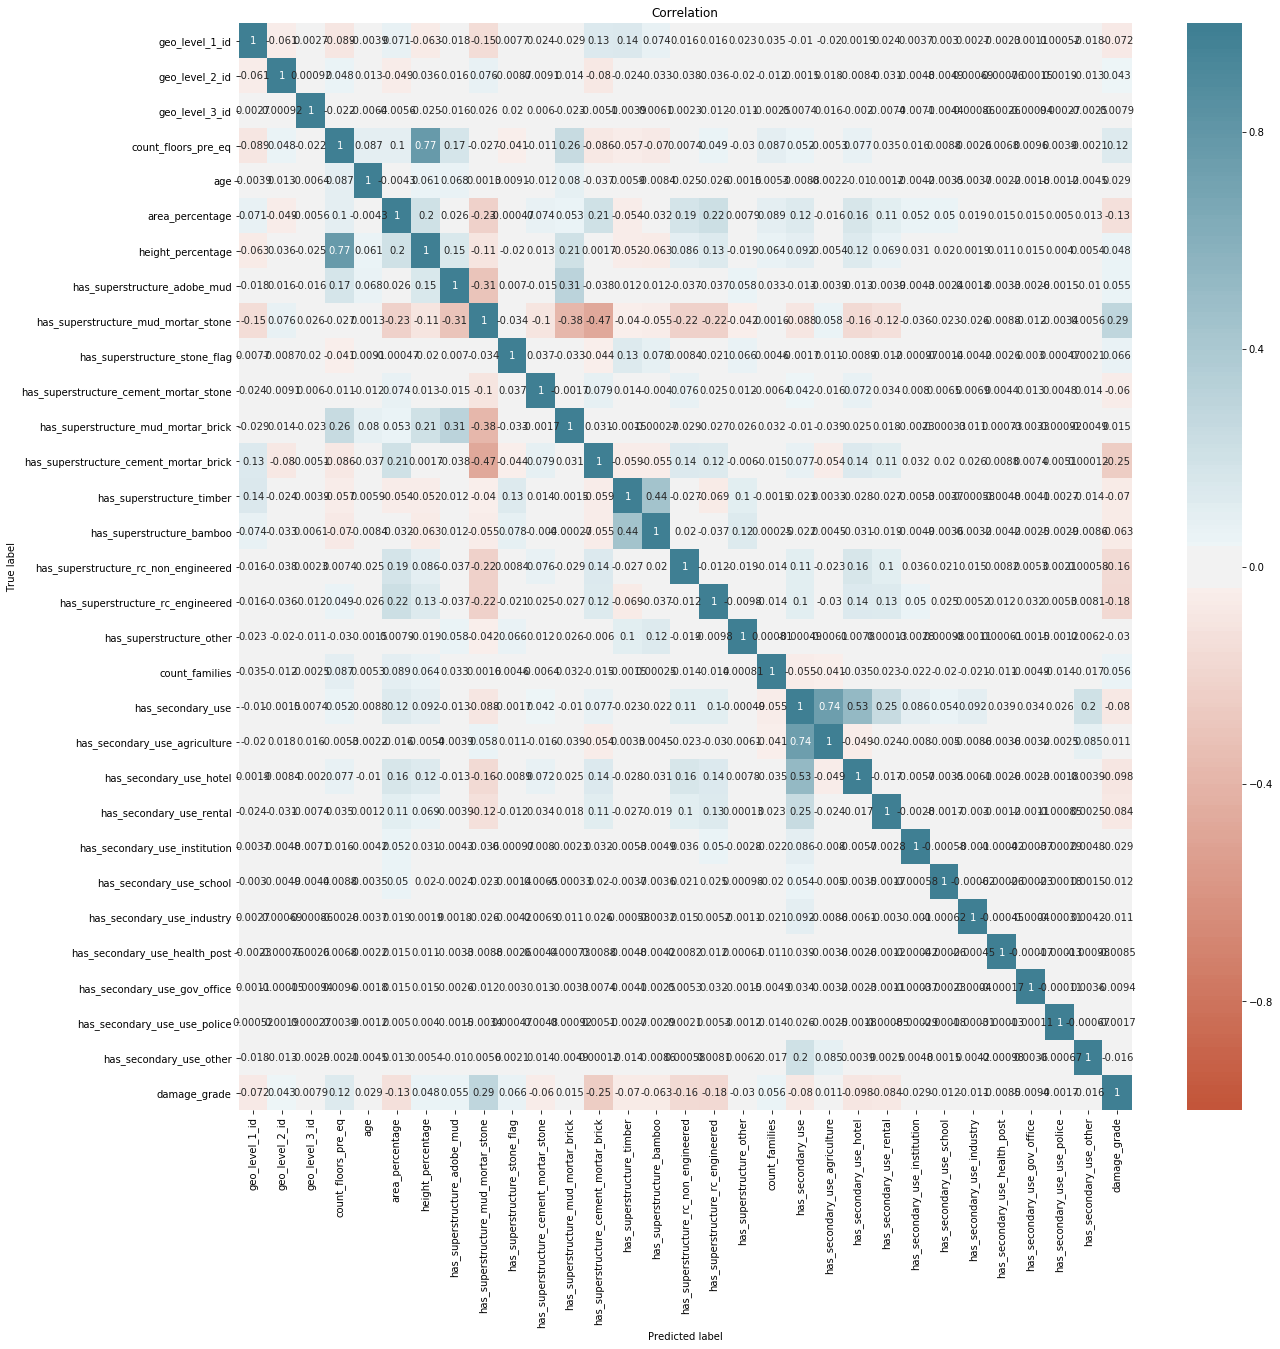

In [242]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(20, 220, n=200), vmax=1, vmin=-1, center=0)
plt.title('Correlation')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [244]:
train.drop(['has_secondary_use_industry', 'has_secondary_use_health_post', 
            'has_secondary_use_gov_office', 'has_secondary_use_use_police', 
            'has_secondary_use_other', 'has_secondary_use_agriculture', 
            'has_secondary_use_institution', 'has_secondary_use_school', 'count_families'], inplace=True, axis=1)

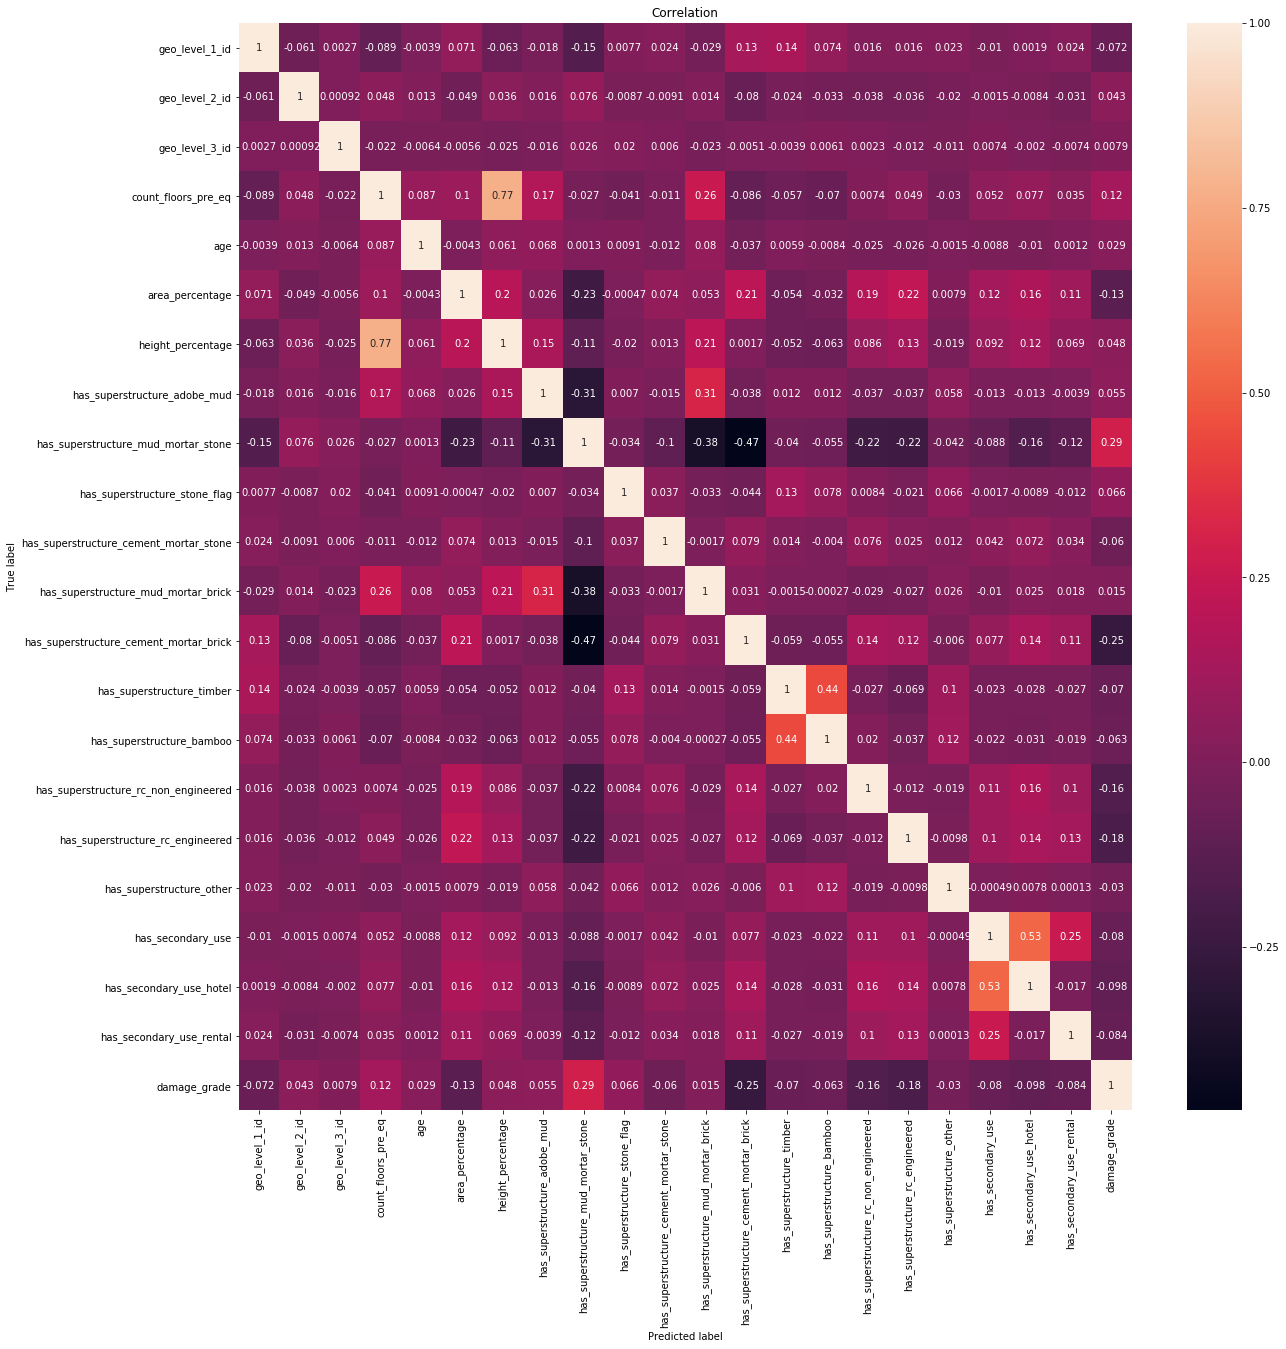

In [245]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.title('Correlation')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

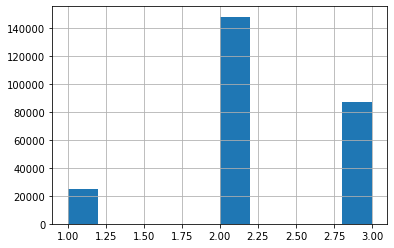

In [246]:
train.damage_grade.hist()

In [247]:
features_list = train.columns.tolist()
features_list.remove('damage_grade')
#features_list

In [248]:
elem = len(train[train['damage_grade'] == 1])

tmp_2 = train[train['damage_grade'] == 2]
tmp_3 = train[train['damage_grade'] == 3]

train.drop(tmp_2.sample(len(tmp_2) - elem).index, inplace=True)
print(train.shape)
train.drop(tmp_3.sample(len(tmp_3) - elem).index, inplace=True)

train.shape

#df_X = df_X.set_index('building_id')
#y = y.set_index('building_id')

(137466, 30)


(75372, 30)

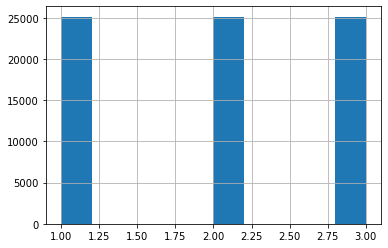

In [249]:
train.damage_grade.hist()

In [250]:
y = train.drop(features_list, axis=1)
df_X = train.drop(['damage_grade'], axis=1)
df_X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,has_secondary_use,has_secondary_use_hotel,has_secondary_use_rental
building_id,,,,,,,,,,,,,,,,,,,,,
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,v,0,0,0
475515,20,323,12236,2,0,8,6,t,w,q,...,1,1,0,0,0,0,v,0,0,0
989500,26,886,994,1,0,13,4,t,i,n,...,1,0,0,0,0,0,v,0,0,0
605134,18,1295,6994,2,25,7,6,t,r,n,...,0,1,0,0,0,0,v,0,0,0
483543,8,41,6024,2,20,16,4,t,r,n,...,0,0,0,0,0,0,v,0,0,0


In [251]:
y.shape

(75372, 1)

In [252]:
lsc = pd.get_dummies(df_X['land_surface_condition'], prefix='land_surface_condition')
ft = pd.get_dummies(df_X['foundation_type'], prefix='foundation_type')
rt = pd.get_dummies(df_X['roof_type'], prefix='roof_type')
gft = pd.get_dummies(df_X['ground_floor_type'], prefix='ground_floor_type')
oft = pd.get_dummies(df_X['other_floor_type'], prefix='other_floor_type')
pos = pd.get_dummies(df_X['position'], prefix='position')
pc = pd.get_dummies(df_X['plan_configuration'], prefix='plan_configuration')
los = pd.get_dummies(df_X['legal_ownership_status'], prefix='legal_ownership_status')

X = pd.concat([df_X, lsc, ft, rt, gft, oft, pos, pc, los], axis=1)

X.drop(['land_surface_condition', 'foundation_type','roof_type','ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'], inplace=True, axis=1)
X.shape

(75372, 59)

# Logistic Regression

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lr_model = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=17, multi_class='multinomial', max_iter=8000))     
])

grid = [
    {'lr__solver': ['newton-cg']},
    {'lr__solver': ['lbfgs']},
    {'lr__solver': ['sag']},
    {'lr__solver': ['saga']}
]

lr_gs = GridSearchCV(lr_model, grid, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
lr_gs.fit(X.astype(float), y.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=8000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'lr__solver': ['newton-cg']}, {'lr__solver': ['lbfgs']}, {'lr__solver': ['sag']}, {'lr__solver': ['saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [71]:
pd.DataFrame(lr_gs.cv_results_).sort_values('rank_test_score').head(1)['mean_test_score']

1    0.577297
Name: mean_test_score, dtype: float64

In [80]:
from sklearn.naive_bayes import GaussianNB

gnb_model = Pipeline([
    ('std_scaler', StandardScaler()),
    ('gnv', GaussianNB())     
])

grid = [
    {'gnv__var_smoothing': np.logspace(-12, -6, 3)}
]

gnb_gs = GridSearchCV(gnb_model, grid, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
gnb_gs.fit(X.astype(float), y.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gnv', GaussianNB(priors=None, var_smoothing=1e-09))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gnv__var_smoothing': array([1.e-12, 1.e-09, 1.e-06])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [81]:
pd.DataFrame(gnb_gs.cv_results_).sort_values('rank_test_score').head(1)['mean_test_score']

2    0.538038
Name: mean_test_score, dtype: float64

In [82]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

clf = Pipeline([
    ('scl', StandardScaler()),
    ('pcp', Perceptron(tol=1e-2, random_state=0, penalty='l2'))
])
p_scores = cross_val_score(clf, X.astype(float), y.values.ravel(), cv=5)
p_scores.mean()

0.4814938893642193

In [129]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y.values.ravel(), test_size=0.33, random_state=42)

xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, max_depth=15, learning_rate=0.02, n_estimators=600, n_jobs=-1))
])

grid = {
    'xgb__min_child_weight': [5, 10],
    'xgb__gamma': [0.5, 1],
    'xgb__subsample': [0.6, 0.8],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__max_depth': [20, 30]
}

clf = GridSearchCV(xgb, grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=2, refit=True)
clf.fit(X.astype(float), y.values.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/usr/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 107.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 620.2min finished
/usr/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=15, min_child_weight=...ate=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'xgb__min_child_weight': [5, 10], 'xgb__gamma': [0.5, 1], 'xgb__subsample': [0.6, 0.8], 'xgb__colsample_bytree': [0.8, 1.0], 'xgb__max_depth': [20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [133]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(3)

/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__colsample_bytree,param_xgb__gamma,param_xgb__max_depth,param_xgb__min_child_weight,param_xgb__subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,1335.001733,11.373303,30.702216,3.633206,0.8,1,20,5,0.6,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1...",...,0.732712,0.003380,1,0.901736,0.901919,0.900061,0.901770,0.900580,0.901213,0.000749
9,1321.370218,10.250666,31.105748,4.108929,0.8,1,20,5,0.8,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1...",...,0.732580,0.004316,2,0.911538,0.911571,0.910128,0.911571,0.910647,0.911091,0.000597
11,1224.461557,22.520865,33.556201,5.240468,0.8,1,20,10,0.8,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1...",...,0.732129,0.003841,3,0.878468,0.877689,0.875682,0.878070,0.876833,0.877348,0.000993


NameError: name 'pyplot' is not defined

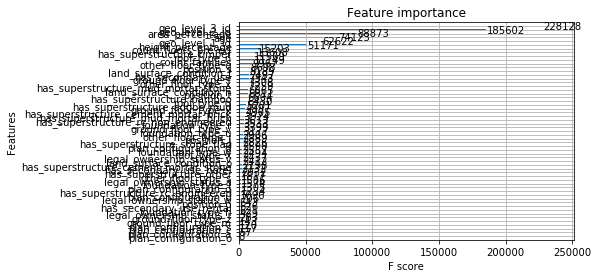

In [137]:
from xgboost import plot_importance

xgb_model = XGBClassifier(objective='multi:softmax',
                          num_class=3, 
                          learning_rate=0.02, 
                          n_estimators=600, 
                          n_jobs=-1,
                          colsample_bytree=0.8,
                          gamma=1,
                          max_depth=20,
                          min_child_weight=5,
                          subsample=0.6)

xgb_model.fit(X.astype(float), y.values.ravel())

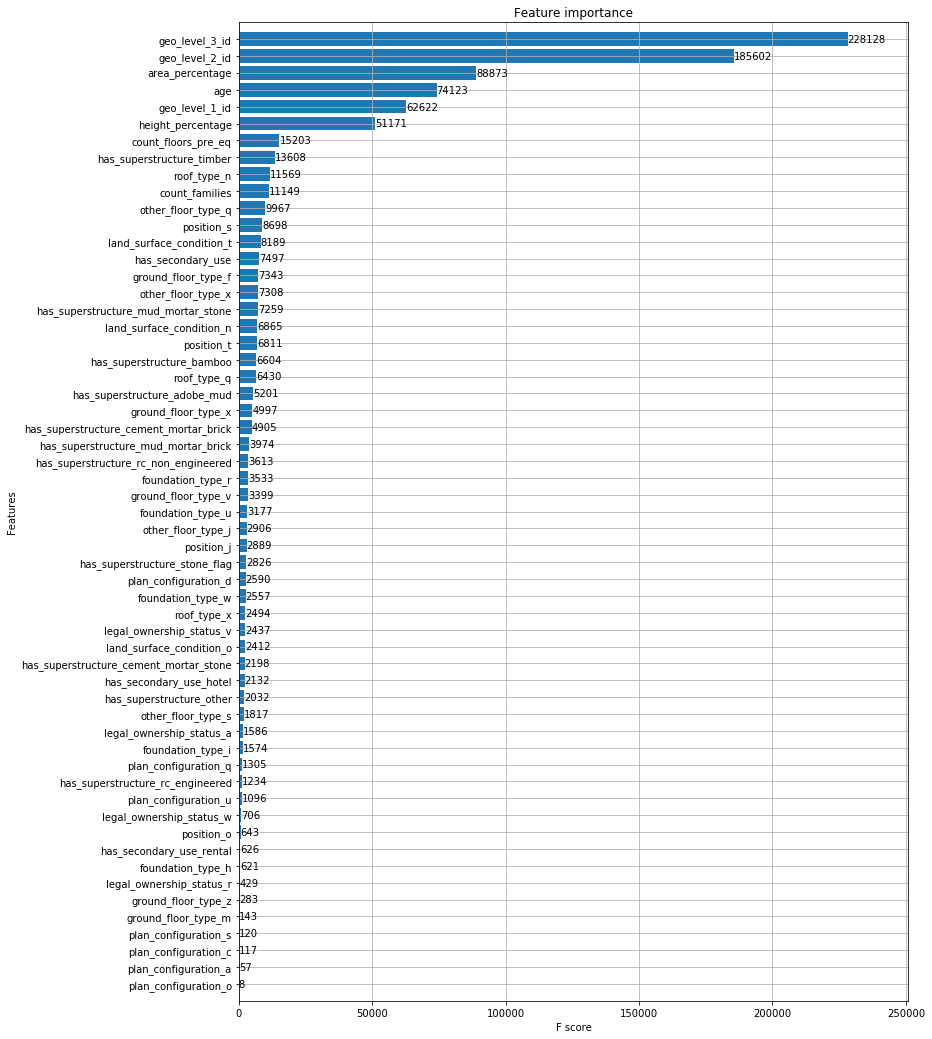

In [144]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_model, height=0.8, ax=ax)
plt.show()

In [150]:
X.drop(['has_secondary_use_rental', 'plan_configuration_s', 
        'plan_configuration_c', 'plan_configuration_a', 
        'plan_configuration_o', 'plan_configuration_d', 
        'plan_configuration_q', 'plan_configuration_u',
        'legal_ownership_status_v', 'legal_ownership_status_a',
        'legal_ownership_status_w', 'legal_ownership_status_r',
       ], axis=1, inplace=True)
X_train.drop(['has_secondary_use_rental', 'plan_configuration_s', 
        'plan_configuration_c', 'plan_configuration_a', 
        'plan_configuration_o', 'plan_configuration_d', 
        'plan_configuration_q', 'plan_configuration_u',
        'legal_ownership_status_v', 'legal_ownership_status_a',
        'legal_ownership_status_w', 'legal_ownership_status_r',
       ], axis=1, inplace=True)
X_test.drop(['has_secondary_use_rental', 'plan_configuration_s', 
        'plan_configuration_c', 'plan_configuration_a', 
        'plan_configuration_o', 'plan_configuration_d', 
        'plan_configuration_q', 'plan_configuration_u',
        'legal_ownership_status_v', 'legal_ownership_status_a',
        'legal_ownership_status_w', 'legal_ownership_status_r',
       ], axis=1, inplace=True)

In [152]:
new_xgb_model = XGBClassifier(objective='multi:softmax',
                          num_class=3, 
                          learning_rate=0.02, 
                          n_estimators=600, 
                          n_jobs=-1,
                          colsample_bytree=0.8,
                          gamma=1,
                          max_depth=20,
                          min_child_weight=5,
                          subsample=0.6)

new_xgb_model.fit(X_train.astype(float), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_delta_step=0,
       max_depth=20, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=-1, nthread=None, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [155]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

y_pred = new_xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[6956, 1051,  188],
       [1346, 5108, 1881],
       [ 283, 1934, 6126]])

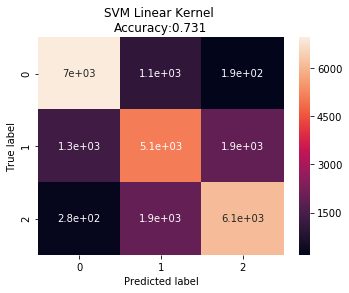

In [156]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [157]:
clf = GridSearchCV(xgb, grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=2, refit=True)
clf.fit(X.astype(float), y.values.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/usr/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 104.1min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 561.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=15, min_child_weight=...ate=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'xgb__min_child_weight': [5, 10], 'xgb__gamma': [0.5, 1], 'xgb__subsample': [0.6, 0.8], 'xgb__colsample_bytree': [0.8, 1.0], 'xgb__max_depth': [20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [158]:
pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(3)

/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__colsample_bytree,param_xgb__gamma,param_xgb__max_depth,param_xgb__min_child_weight,param_xgb__subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,1039.210104,8.717936,45.174697,5.978442,0.8,0.5,20,10,0.6,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",...,0.732275,0.003543,1,0.881586,0.881553,0.879745,0.881686,0.880332,0.880980,0.000792
8,1178.459601,10.475895,32.356954,3.491778,0.8,1,20,5,0.6,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1...",...,0.731784,0.003877,2,0.903445,0.902516,0.900741,0.902930,0.901642,0.902255,0.000960
3,1071.097583,24.826952,54.676564,3.772041,0.8,0.5,20,10,0.8,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",...,0.731757,0.004539,3,0.896910,0.895418,0.893942,0.896512,0.895837,0.895724,0.001031


In [256]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

bg = Pipeline([
    #('std', StandardScaler()),
    ('bg', BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_jobs=-1, max_features=0.3, max_samples=0.3, n_estimators=300, oob_score=True))
])
bg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bg', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
     ...stimators=300, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False))])

In [257]:
bg.score(X_test, y_test)

0.7192538093515056

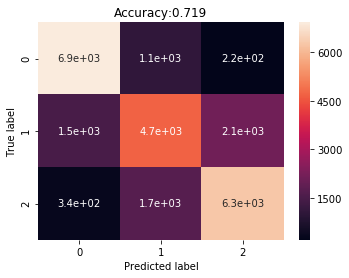

In [258]:
y_pred = bg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()